In [1]:
%%html
<h2>Tensorflowによる実装 2：多クラスロジスティック回帰</h2>

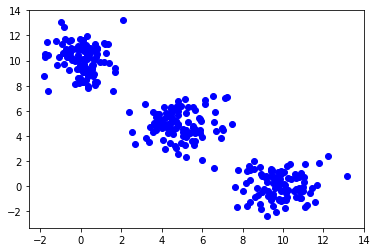

In [2]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

from sklearn.utils import shuffle
M = 2 # 入力データの次元
K = 3 # クラス数
n = 100   # クラスごとのデータ数
N = n * K # 全データ数


X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])

Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

import matplotlib.pyplot as plt
# 散布図にプロットのための関数
def plot(data1, data2, data3):
    # キャンバスを描く
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    x1, y1 = np.array([[x[0], x[1]] for x in data1]).T
    ax.scatter(x1, y1, color='b')

    x2, y2 = np.array([[x[0], x[1]] for x in data2]).T
    ax.scatter(x2, y2, color='b')
    
    x3, y3 = np.array([[x[0], x[1]] for x in data3]).T
    ax.scatter(x3, y3, color='b')
    
    plt.show()

plot(X1, X2, X3)

In [49]:
# 散布図 + 境界線プロット
def plot2(data1, data2, data3,  W_val, b_val):
    # キャンバスを描く
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    x1, y1 = np.array([[x[0], x[1]] for x in data1]).T
    ax.scatter(x1, y1, color='b')

    x2, y2 = np.array([[x[0], x[1]] for x in data2]).T
    ax.scatter(x2, y2, color='b')
    
    x3, y3 = np.array([[x[0], x[1]] for x in data3]).T
    ax.scatter(x3, y3, color='b')
    
    line_x = np.linspace(-3,15,18)
    line_y = - W_val[0][0] * line_x / W_val[1][0] - b_val[0] / W_val[1][0]
    plt.plot(line_x, line_y, "r-") 
      
    plt.show()


classified: [ True  True  True  True  True  True  True  True  True  True]
output probability:: [[  7.67561083e-04   9.28887248e-01   7.03450963e-02]
 [  2.33345454e-09   4.49751318e-03   9.95502532e-01]
 [  2.23463215e-02   9.76074874e-01   1.57884671e-03]
 [  9.55990672e-01   4.40092273e-02   1.55223262e-07]
 [  1.87811838e-03   9.97193515e-01   9.28456080e-04]
 [  9.83710527e-01   1.62894838e-02   2.79754477e-08]
 [  9.90419805e-01   9.58026666e-03   1.79762711e-08]
 [  4.74170037e-10   7.91017711e-03   9.92089868e-01]
 [  9.96825814e-01   3.17420345e-03   4.12573586e-11]
 [  2.75607176e-10   2.46100128e-03   9.97539043e-01]]
[[-1.22902501  0.32918784  0.89983809]
 [ 0.88357532  0.34727651 -1.23085213]]
[-0.05931525  0.12551847 -0.06620319]


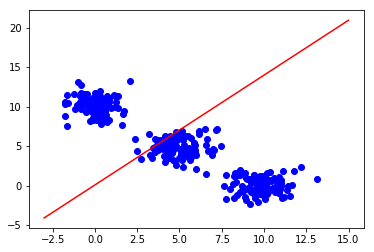

In [50]:
# 重み、バイアスの初期値
import tensorflow as tf

W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

batch_size = 50 # ミニバッチサイズ
n_batches  = N  # バッチサイズ
epochs = 30     # 試行回数

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.global_variables_initializer().run()

    for epoch in range(epochs):
        X_, Y_ = shuffle(X, Y)
        
        for i in range(n_batches):
            start = i * batch_size
            end   = start + batch_size
            train_feed = {x: X_[start:end], t: Y_[start:end]}
            sess.run(train_step, feed_dict=train_feed)

    # 学習結果の確認
    X_, Y_ = shuffle(X, Y)
    train_feed = {x: X_[0:10], t: Y_[0:10]}
    classified = correct_prediction.eval(session=sess, feed_dict=train_feed)
    prob = y.eval(session=sess, feed_dict={ x:X_[0:10] })
    print('classified:', classified)
    print('output probability::', prob)
    
    b_val, W_val = sess.run([b, W])
    print(W_val)
    print(b_val)
    plot2(X1, X2, X3, W_val, b_val)